In [93]:

# 필요 패키지 import
import pandas
import numpy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#
# 1. DATA LOAD
# 
# Kaggle에서 제공하는 [BNP Paribas Cardif Claims Management](https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/data)데이터를 활용
# BNP Paribas Cardif 청구관리 데이터 셋으로 고객의 클레임 여부를 판단하는 데이터셋의 Subset
DATA_PATH = "c:\\Users\\WAI\\OneDrive\\03.WORKSPACE\\00.DATA\\"
df = pandas.read_csv(DATA_PATH + "BookExample.csv")
print(df.shape) # (20000, 33)

# 연속형 변수만 추출
n_obj_cols = []
for col, type in zip(df.dtypes.index, df.dtypes.values):
    if type != ("object"):
        n_obj_cols.append(col)

n_obj_df = df[n_obj_cols]
print(n_obj_df.shape)


x = n_obj_df.drop(labels=["ID","target"], axis=1)
y = n_obj_df["target"]



(20000, 33)
(20000, 28)


[-0.00277377  0.00070383  0.00128166 -0.00047166  0.00255667  0.00070384
 -0.00086559 -0.00044627  0.03281774 -0.00035073 -0.02282838 -0.0006322
  0.01903138 -0.00188731 -0.00042178  0.00070379  0.00449733 -0.01409045
 -0.00026616 -0.00284282 -0.00119099 -0.00145339 -0.00099186  0.00070706
 -0.00077408 -0.00033097]
y = (-0.02283)v12 + (-0.01409)v19 + (-0.00284)v21 + (-0.00277)v1 + (-0.00189)v15 + (-0.00145)v25 + (-0.00119)v23 + (-0.00099)v26 + (-0.00087)v8 + (-0.00077)v28 + (-0.00063)v13 + (-0.00047)v5 + (-0.00045)v9 + (-0.00042)v16 + (-0.00035)v11 + (-0.00033)v29 + (-0.00027)v20 + (0.0007)v17 + (0.0007)v2 + (0.0007)v7 + (0.00071)v27 + (0.00128)v4 + (0.00256)v6 + (0.0045)v18 + (0.01903)v14 + (0.03282)v10 + 0.65498
Index(['coef'], dtype='object')


<AxesSubplot:xlabel='colname'>

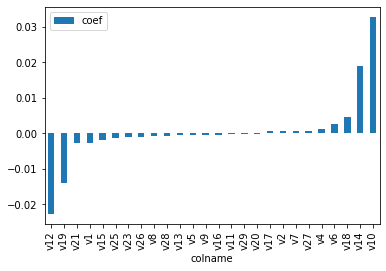

In [66]:
# 1. Ridge Regression
#  선형모델의 예측력 또는 설명력을 높이기 위해 여러 정규화 방법들을 사용합니다.
#  대표적인 shrinkage 방법에는 ridge와 lasso가 있습니다. 기본선형모델과 유사하나, 잔차에 제약조건을 추가하여 
#  선형회귀식을 정규화 시키는 방법입니다.
#  Ridge는 각 계수의 제곱을 더한값을 제약조건으로 포함시켜 각 특성의 계수의 크기도 함께 최소화 만드는 차이가 있습니다.
#  분산이 커지는 상황을 막기 위해 계수가 큰 특성에 페널티를 추가하여, 보다 부드럽게 계수를 선택할 수 있습니다. 
#  특성의 크기가 결과에 큰 영향을 미치기 때문에, 스케일링(Scaling)을 통해 특성의 사이즈를 비슷하게 만들어 주어야 합니다.
 
# 표준화
#x = StandardScaler().fit_transform(x) 
# Ridge regression 파라미터 normalize 를 사용하여
ridgeReg = Ridge(alpha=0.5, normalize=True)
ridgeReg.fit(x, y)
test_x = x.tail(1)
test_y = y.tail(1)
pred = ridgeReg.predict(test_x)
mse = numpy.mean((pred - test_y)**2)

print(ridgeReg.coef_)

# Ridge Coefficients plot

coef_df = pandas.DataFrame({"colname" : x.columns.values, "coef" : ridgeReg.coef_})
coef_df = coef_df.sort_values("coef", ascending=True)
coef_df.set_index("colname", inplace=True)
expression = "y = "
for colname, coef in zip(coef_df.index, coef_df.coef):
    expression = expression + "(" + str(round(coef,5)) + ")"+ colname + " + " 
expression = expression + str(round(ridgeReg.intercept_,5))
print(expression)

# Ridge의 회귀 계수의 값의 임계치를 정해 임계치 이상의 특성만 추출하여 Feature Selection을 할 수 있습니다.

threshold = 0.0008
selection_df = coef_df.loc[ numpy.abs(coef_df.coef) > threshold]
print(selection_df.columns)

coef_df.plot.bar()

0.4556884578678631
y = (-0.15198)v12 + (-0.00159)v25 + (-0.00146)v11 + (-0.00139)v23 + (-0.0004)v20 + (-0.0)v1 + (0.0)v27 + (-0.0)v26 + (-0.0)v21 + (-0.0)v19 + (0.0)v18 + (0.0)v17 + (-0.0)v16 + (-0.0)v29 + (-0.0)v28 + (-0.0)v13 + (-0.0)v9 + (-0.0)v8 + (0.0)v7 + (0.0)v6 + (-0.0)v5 + (0.0)v4 + (-0.0)v15 + (0.0021)v2 + (0.015)v14 + (0.12713)v10 + 0.65498
             coef
colname          
v12     -0.151983
v25     -0.001587
v11     -0.001461
v23     -0.001388
v20     -0.000402
v2       0.002097
v14      0.014997
v10      0.127134


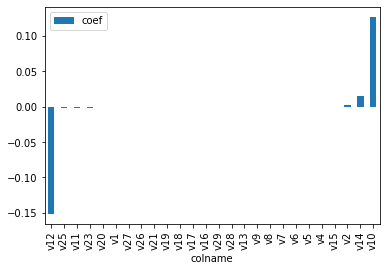

In [76]:
# 2. Lasso
#  Lasso 역시 Ridge와 마찬가지로 모형의 예측력을 높히기 위해 정규화 방법을 사용하는 선형회귀 모델입니다.
#  Ridge 와 다른점은 정규화 방법으로 '각 계수의 절대값의 합'을 수식에 포함하여 계수의 크기를 최소화하는 방법을 사용합니다. 
#  Lasso의 잔차제곱합에 계수의 절대값의 합을 경사하강법을 수행하면 일부 덜 중요한 계수들이 0으로 수렴하는 결과가 나옵니다. 
#  이렇게 계수가 0이 되는 특성들을 제외할수 있으므로, 자연스럽게 Feature selection 효과가 나타납니다datetime A combination of a date and a time. Attributes: ()

lassoReg = Lasso(alpha = 0.005)
lassoReg.fit(x,y)
pred = lassoReg.predict(test_x)
mse =  numpy.mean((pred - test_y)**2)

print(mse)

# Lasso Coefficients plot

coef_df = pandas.DataFrame({"colname" : x.columns.values, "coef" : lassoReg.coef_})
coef_df = coef_df.sort_values("coef", ascending=True)
coef_df.set_index("colname", inplace=True)
expression = "y = "
for colname, coef in zip(coef_df.index, coef_df.coef):
    expression = expression + "(" + str(round(coef,5)) + ")"+ colname + " + " 
expression = expression + str(round(ridgeReg.intercept_,5))
print(expression)


coef_df.plot.bar()

threshold = 0.0008
selection_df = coef_df.loc[numpy.abs(coef_df.coef) != 0]

# 0으로 수렴한 특성을 제외한 나머지 특성들을 통해 Feature selection을 수행할 수 있습니다. 
print(selection_df)


In [92]:
# 3. Select From Model
# scikit-learn에서 제공하는 API의 Feature_Selection중 SelectFromModel 메소드를 사용합니다.
# 모델 훈련이 끝난 후 사용자가 지정한 임계깞을 기반으로 특성을 선택하는 방법입니다. 
# Tree 기반의 모델은 Feature Importance라는 Attribute를 이미 가지고 있습니다. 
# RandomForest, GradientBoosting, LogisticRegression의 세 가지 모델의 FeatureSelection 결과를 비교해 보겠습니다.
# SelectFromModel에 임계치를 지정하는 파라미너 threshold가 있습니다.
# float형의 값을 지정하거나, "mean", "median" 과 같은 String 값을 지정할 수 있습니다
# 기본값은 mean 입니다.
rfSelector = SelectFromModel(estimator = RandomForestClassifier(n_estimators=10), threshold="mean").fit(x,y)
gbSelector = SelectFromModel(estimator = GradientBoostingClassifier(n_estimators=10), threshold="mean").fit(x,y)
lrSelector = SelectFromModel(estimator = LogisticRegression(C=0.05), threshold="mean").fit(x,y)

columns = x.columns

rf_selected = columns[rfSelector.get_support()]
gb_selected = columns[gbSelector.get_support()]
lr_seleted = columns[lrSelector.get_support()]

print("RandomForest 로 선택된 변수 개수 : {}, 컬럼명 : {}".format(len(rf_selected),rf_selected.values))
print("GradientBoosting 으로 선택된 변수 개수 : {}, 컬럼명 : {}".format(len(gb_selected), gb_selected.values))
print("Logistic 으로 선택된 변수 개수 : {}, 컬럼명 : {}".format(len(lr_seleted), lr_seleted.values))



RandomForest 로 선택된 변수 개수 : 4, 컬럼명 : ['v10' 'v12' 'v14' 'v21']
GradientBoosting 으로 선택된 변수 개수 : 3, 컬럼명 : ['v10' 'v12' 'v14']
Logistic 으로 선택된 변수 개수 : 6, 컬럼명 : ['v7' 'v10' 'v12' 'v13' 'v15' 'v26']


In [114]:
# 4. Feature Importance
# Tree 기반 모형은 Feature Importance를 제공합니다. Feature Importance는 불확실도를 많이 낮출수록 증가하므로
# 이를 기준으로 Feature Selection을 할 수 있습니다


# Decision Tree
dt_clf = DecisionTreeClassifier(criterion='gini',max_depth=5)
dt_clf.fit(x,y)
dt_clf.feature_importances_
dt_df = pandas.DataFrame({"colname" : x.columns.values, "feature_importance" : dt_clf.feature_importances_}).sort_values("feature_importance",ascending=False)
print(dt_df)
selected_dt_df = dt_df.loc[dt_df.feature_importance > 0 ]
print("Decision Tree로 선택된 특성수 : {} , 컬럼명 : {}".format(len(selected_dt_df), selected_dt_df.colname.values))

# Extra Tree 
et_clf = ExtraTreeClassifier(criterion='gini',max_depth=5)
et_clf.fit(x,y)
et_clf.feature_importances_
et_df = pandas.DataFrame({"colname" : x.columns.values, "feature_importance" : et_clf.feature_importances_}).sort_values("feature_importance",ascending=False)
print(et_df)
selected_et_df = dt_df.loc[et_df.feature_importance > 0 ]
print("Extra Tree로 선택된 특성수 : {} , 컬럼명 : {}".format(len(selected_et_df), selected_et_df.colname.values))


# RandomForest 
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=5)
rf_clf.fit(x,y)
rf_df = pandas.DataFrame({"colname" : x.columns.values, "feature_importance" : rf_clf.feature_importances_}).sort_values("feature_importance",ascending=False)
print(rf_df)
selected_rf_df = rf_df.loc[rf_df.feature_importance > 0 ]
print("Extra Tree로 선택된 특성수 : {} , 컬럼명 : {}".format(len(selected_rf_df), selected_rf_df.colname.values))



   colname  feature_importance
8      v10            0.642614
10     v12            0.300957
9      v11            0.014254
1       v2            0.009763
12     v14            0.008018
4       v6            0.007078
5       v7            0.005696
19     v21            0.004787
0       v1            0.004035
20     v23            0.002799
17     v19            0.000000
24     v28            0.000000
23     v27            0.000000
22     v26            0.000000
21     v25            0.000000
18     v20            0.000000
13     v15            0.000000
16     v18            0.000000
15     v17            0.000000
14     v16            0.000000
11     v13            0.000000
7       v9            0.000000
6       v8            0.000000
3       v5            0.000000
2       v4            0.000000
25     v29            0.000000
Decision Tree로 선택된 특성수 : 10 , 컬럼명 : ['v10' 'v12' 'v11' 'v2' 'v14' 'v6' 'v7' 'v21' 'v1' 'v23']
   colname  feature_importance
8      v10            0.412564
12     